# **AI vs Real: Human Face Authenticity Classifier**

---

With the rise of AI-generated faces from models like GANs (Generative Adversarial Networks) and diffusion-based AI, distinguishing between real and synthetic human faces has become a significant challenge. This project aims to develop a deep learning-based classifier capable of differentiating between AI-generated and real human faces with high accuracy.

The dataset we'll be using for this project will be derived from **Kaggle**.
<br>(Kaggle is a data science competition platform and online community for data scientists and machine learning practitioners under Google LLC.)
- Dataset name: Human Faces Dataset
- The dataset contains around 9.6k images of human faces which are both real images and those generated by AI.
- The zip contains two folders:
     - Real Images: 5000 images of real human faces
     - AI-Generated Images: 4630 images of ai-generated human faces. 

---

## **Steps**

### **Import the required libraries**
Imported essential python libraries such as **numpy**, **pandas**, **tensorflow**, **os** etc... for imageprocessing, model training and evaluation.

### **Define our Dataset Path**
Specify the directory where the dataset is stored.

### **Create train, test, and validation directories**
We have created three main directories:
- Train set (70%) : Used to train the model.
- Test set (15%) : Used to test the model.
- Validation set (15%) : Used for model validation.

### **Split and copy the images into our seperate folders**
We define functions to randomly split and move images into folders while maintaining balance between real and ai generated images.

### **Data Preprocesssing**
- Resize images : **224 X 224 pixels** (Its the standard image input size for deep learning models
- Convert images : numpy arrays
- Normalize the pixel values to improve model efficiency

### **Create Data Generators**
- We've used **ImageDataGenerator** to load images in batches and reduce the memory usage.
- Defined **binaryclassification** (as it's two values ie. Real and AI)

### **Load the model**
- We are using **"Resnet 50"**, a powerful Deep Learning model already trained by millions of images.
- Removed the fully connected top layers to replace theem with custom layers for our classification purpose.

### **Define and compile model**
- Add layers on top of Resnet50
     - GlobalAveragePooling2D : To reduce dimensions.
     - Dense (128 neurons, ReLU activation) : To learn complex patterns.
     - Dense (1 neuron, Sigmoid activation) : To classify images.
- Froze the Resnet50 base layers (to avoid retraining)
- We compiled the model using **adam-optimizer** and **binary cross-entropy loss**

### **Train the model**
- Trained the model for 15 epochs, using the training set and validating it on the validation set.
- Unfreeze the last few layers and fine tune and train and validate the model again.

### **Evaluate the model on test data**
Measure the **Test Accuracy** and **Test loss** to measure the final performance.

### **Visualize the model predictions**
- Select 20 random images from the validation set.
- Predict
- Display images with their true labels, predicted labels, and whether the prediction is correct.

### **Save the model**
Finally we save our trained, tested and validated model.

---

### **Explanation of Imported Libraries and Their Purpose**  

1. **`shutil`** – Used for file operations like copying and moving images to different directories (train, validation, test).  
2. **`random`** – Helps shuffle the dataset before splitting it into training, validation, and testing sets.  
3. **`os`** – Handles file path operations (creating directories, joining paths, checking files).  
4. **`numpy`** – Efficient handling of image data as numerical arrays for deep learning models.  
5. **`pandas`** – Used to organize and display prediction results in a structured DataFrame.  
6. **`matplotlib.pyplot`** – Visualizes images, accuracy, and loss graphs for better understanding of model performance.  
7. **`Pathlib.Path`** – Simplifies file and directory path handling in a cross-platform way.  
8. **`tensorflow`** – Core deep learning framework for building and training the image classification model.  
9. **`ImageDataGenerator`** – Loads images efficiently in batches, applies transformations like rescaling.  
10. **`ResNet50`** – A pre-trained deep learning model used as the backbone for image classification.  
11. **`Dense`** – A fully connected layer for learning patterns in image features.  
12. **`GlobalAveragePooling2D`** – Reduces feature dimensions, preventing overfitting and improving efficiency.  
13. **`Dropout`** – Regularization technique to prevent overfitting by randomly disabling neurons during training.  
14. **`Model`** – Defines the neural network architecture by connecting layers together.  
15. **`Adam`** – Optimizer that adjusts learning rates dynamically for better and faster model training.  
16. **`ReduceLROnPlateau`** – Automatically reduces the learning rate when training improvement slows down.  
17. **`EarlyStopping`** – Stops training early if model performance stops improving, preventing overfitting.  

In [ ]:
#import required libraries
import shutil
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
# Set dataset paths
dataset_path = Path(r'C:/Users/anany/Downloads/AI_or_Real/dataset_root') #add your own dataset path here
output_path = Path(r'C:/Users/anany/Downloads/AI_or_Real') #add your own output path here

# Create train, val, test directories
for split in ['train', 'val', 'test']:
    for category in ['Real Images', 'AI-Generated Images']:
        Path(output_path / split / category).mkdir(parents=True, exist_ok=True)

- **Define split ratios** → 70% training, 15% validation, 15% testing.  
- **Shuffle images** → Ensures randomness before splitting.  
- **Split images** →  
  - First **70%** go to the training folder.  
  - Next **15%** go to the validation folder.  
  - Remaining **15%** go to the test folder.  
- **Copy images** → Places them in respective directories (train, val, test) for both **real** and **AI-generated** images.  

In [5]:
# Split data
train_split, val_split, test_split = 0.7, 0.15, 0.15

def split_images(source_dir, dest_dirs, split_ratios):
    images = [img for img in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, img))]
    random.shuffle(images)

    train_size = int(len(images) * split_ratios[0])
    val_size = int(len(images) * split_ratios[1])

    for i, img in enumerate(images):
        if i < train_size:
            dest_dir = dest_dirs[0]
        elif i < train_size + val_size:
            dest_dir = dest_dirs[1]
        else:
            dest_dir = dest_dirs[2]

        shutil.copy(os.path.join(source_dir, img), os.path.join(dest_dir, img))

# Apply to both real and AI-generated images
split_images(dataset_path / 'Real Images', 
             [output_path / 'train' / 'Real Images', output_path / 'val' / 'Real Images', output_path / 'test' / 'Real Images'], 
             [train_split, val_split, test_split])

split_images(dataset_path / 'AI-Generated Images', 
             [output_path / 'train' / 'AI-Generated Images', output_path / 'val' / 'AI-Generated Images', output_path / 'test' / 'AI-Generated Images'], 
             [train_split, val_split, test_split])

---

#### **1. Set Image Parameters**  
- **img_height = 224, img_width = 224** → Resizes all images to 224×224 pixels (required for ResNet50).  
- **batch_size = 32** → Loads images in batches of 32 for efficient training. ( You can choose any batch_size ).  

#### **2. Data Augmentation for Training (train_datagen)**  
- **rescale=1./255** → Normalizes pixel values (0-255) to (0-1) for better model performance.  
- **rotation_range=20** → Rotates images randomly by up to 20 degrees.  
- **width_shift_range=0.2 & height_shift_range=0.2** → Shifts images horizontally or vertically by 20%.  
- **shear_range=0.2** → Applies shear transformations (slanting effect).  
- **zoom_range=0.2** → Zooms in/out randomly within a 20% range.  
- **horizontal_flip=True** → Flips images horizontally to increase data variety.  

#### **3. Validation & Test Data Processing (val_test_datagen)**  
- **rescale=1./255** → Only normalizes pixel values (no augmentation).  
- **Why?** Validation and test sets should remain unchanged to evaluate the model fairly.  

In [7]:
# Image parameters
img_height, img_width, batch_size = 224, 224, 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Load images
train_generator = train_datagen.flow_from_directory(
    output_path / 'train', target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(
    output_path / 'val', target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(
    output_path / 'test', target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')


Found 6741 images belonging to 2 classes.
Found 1444 images belonging to 2 classes.
Found 1445 images belonging to 2 classes.


---

**1. Load Pre-Trained ResNet50 Model**  
- ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 
  - Loads a pre-trained ResNet50 model (trained on ImageNet).  
  - include_top=False          : Removes the fully connected layer so we can add custom layers.  
  - input_shape=(224, 224, 3)  : Accepts 224×224 RGB images.  

**2. Freeze Pre-Trained Layers**  
- for layer in base_model.layers: layer.trainable = False  
  - Freezes all ResNet50 layers : Prevents them from updating in the initial training phase.  
  - This helps retain pre-trained knowledge while we train new layers.  

**3. Add Custom Layers for Classification**  
- GlobalAveragePooling2D()      : Converts feature maps into a single 1D vector (reduces parameters).  
- Dense(256, activation='relu') : Adds a dense layer with 256 neurons and ReLU activation.  
- Dropout(0.4)                  : Drops 40% of neurons randomly during training (prevents overfitting).  
- Dense(128, activation='relu') : Adds another dense layer with 128 neurons.  
- Dense(1, activation='sigmoid'): Final output layer with 1 neuron (binary classification: Real vs AI).  

**4. Compile the Model**  
- optimizer=Adam(learning_rate=0.001) : Uses Adam optimizer with a learning rate of **0.001**.  
- loss='binary_crossentropy'          : Since it's a binary classification task.  
- metrics=['accuracy']                : Tracks accuracy during training.  

**5. Add Callbacks for Better Training**  
- ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)  
  - Reduces the learning rate by 50% if validation loss doesn't improve for 3 epochs.  
- EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)  
  - Stops training if validation loss doesn't improve for 5 epochs.  
  - Restores the best model weights before stopping.  

**6. Train the Model**  
- model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[reduce_lr, early_stop]) 
  - Trains the model for 15 epochs using augmented training data.  
  - Validates using validation data after each epoch.  
  - Uses callbacks to adjust learning rate and prevent overfitting.  

In [11]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)  # Added dropout to reduce overfitting
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[reduce_lr, early_stop])

C:\Users\anany\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 1057s 5s/step - accuracy: 0.5430 - loss: 0.7160 - val_accuracy: 0.6551 - val_loss: 0.5495 - learning_rate: 0.0010
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 878s 4s/step - accuracy: 0.6971 - loss: 0.5626 - val_accuracy: 0.7922 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 878s 4s/step - accuracy: 0.7483 - loss: 0.4921 - val_accuracy: 0.7230 - val_loss: 0.5015 - learning_rate: 0.0010
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 871s 4s/step - accuracy: 0.7531 - loss: 0.4945 - val_accuracy: 0.8601 - val_loss: 0.3657 - learning_rate: 0.0010
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 893s 4s/step - accuracy: 0.7605 - loss: 0.4818 - val_accuracy: 0.8213 - val_loss: 0.3938 - learning_rate: 0.0010
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 912s 4s/step - accuracy: 0.7710 - loss: 0.4620 - val_accuracy: 0.8830 - val_loss: 0.3190 - learning_rate: 0.0010
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 1367s 6s/step - accuracy: 0.7814 - loss: 

Here, we can observe that model shows steady improvement, reaching 82.07% accuracy and 90.10% validation accuracy by epoch 15. The validation loss decreases consistently, indicating good generalization. A learning rate reduction at epoch 14 further stabilizes the performance of our model.

---
- Unfreeze last 10 layers to fine-tune dataset-specific features.  
- Lower learning rate (1e-5) to prevent drastic weight updates.  
- Train for 5 more epochs to improve accuracy while retaining pre-trained knowledge.  
- Callbacks (`reduce_lr`, `early_stop`) prevent overfitting.  
- This enhances model’s ability to distinguish real vs AI-generated faces.

In [13]:
# Unfreeze last few layers and fine-tune
for layer in base_model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=5, callbacks=[reduce_lr, early_stop])

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 997s 5s/step - accuracy: 0.6883 - loss: 11.6420 - val_accuracy: 0.5194 - val_loss: 4.5257 - learning_rate: 1.0000e-05
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 970s 5s/step - accuracy: 0.8653 - loss: 0.3154 - val_accuracy: 0.8989 - val_loss: 0.2607 - learning_rate: 1.0000e-05
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1214s 6s/step - accuracy: 0.8719 - loss: 0.3013 - val_accuracy: 0.8954 - val_loss: 0.2147 - learning_rate: 1.0000e-05
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 842s 4s/step - accuracy: 0.8931 - loss: 0.2611 - val_accuracy: 0.9120 - val_loss: 0.1799 - learning_rate: 1.0000e-05
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.8940 - loss: 0.2504 - val_accuracy: 0.9328 - val_loss: 0.1753 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 5.


We can observe that fine-tuning significantly improved performance, boosting accuracy to **89.40%** and validation accuracy to **93.28%** while reducing validation loss. The model generalizes well with a lower learning rate, confirming the effectiveness of unfreezing the last layers.

---

### **Evaluation and Plot**

46/46 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.9176 - loss: 0.2141
Test Loss: 0.2220
Test Accuracy: 91.2803%


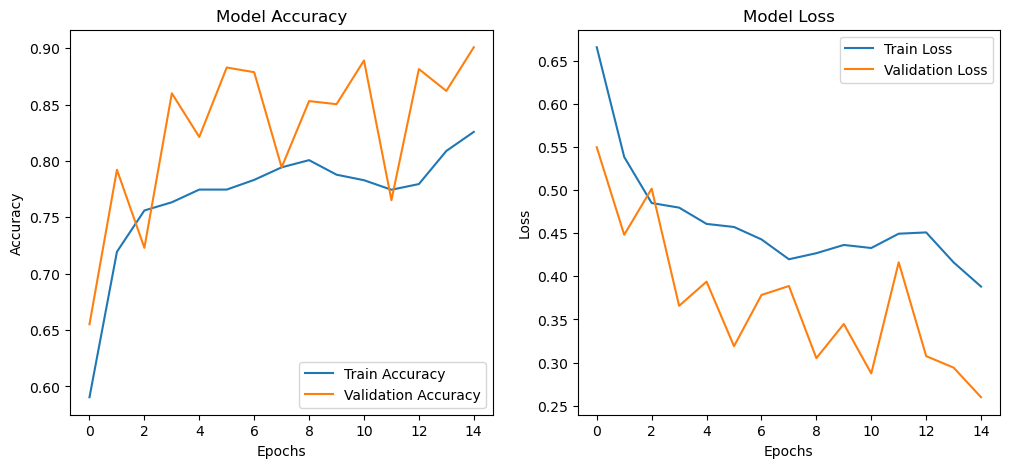

In [15]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4%}')

# Plot training history
def plot_training(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training(history)

The model performs well on the test set, achieving **91.28% accuracy** with a **low test loss of 0.2220**, indicating strong generalization. The training history confirms stable learning, with minimal overfitting and consistent improvements in accuracy and loss.

### **Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


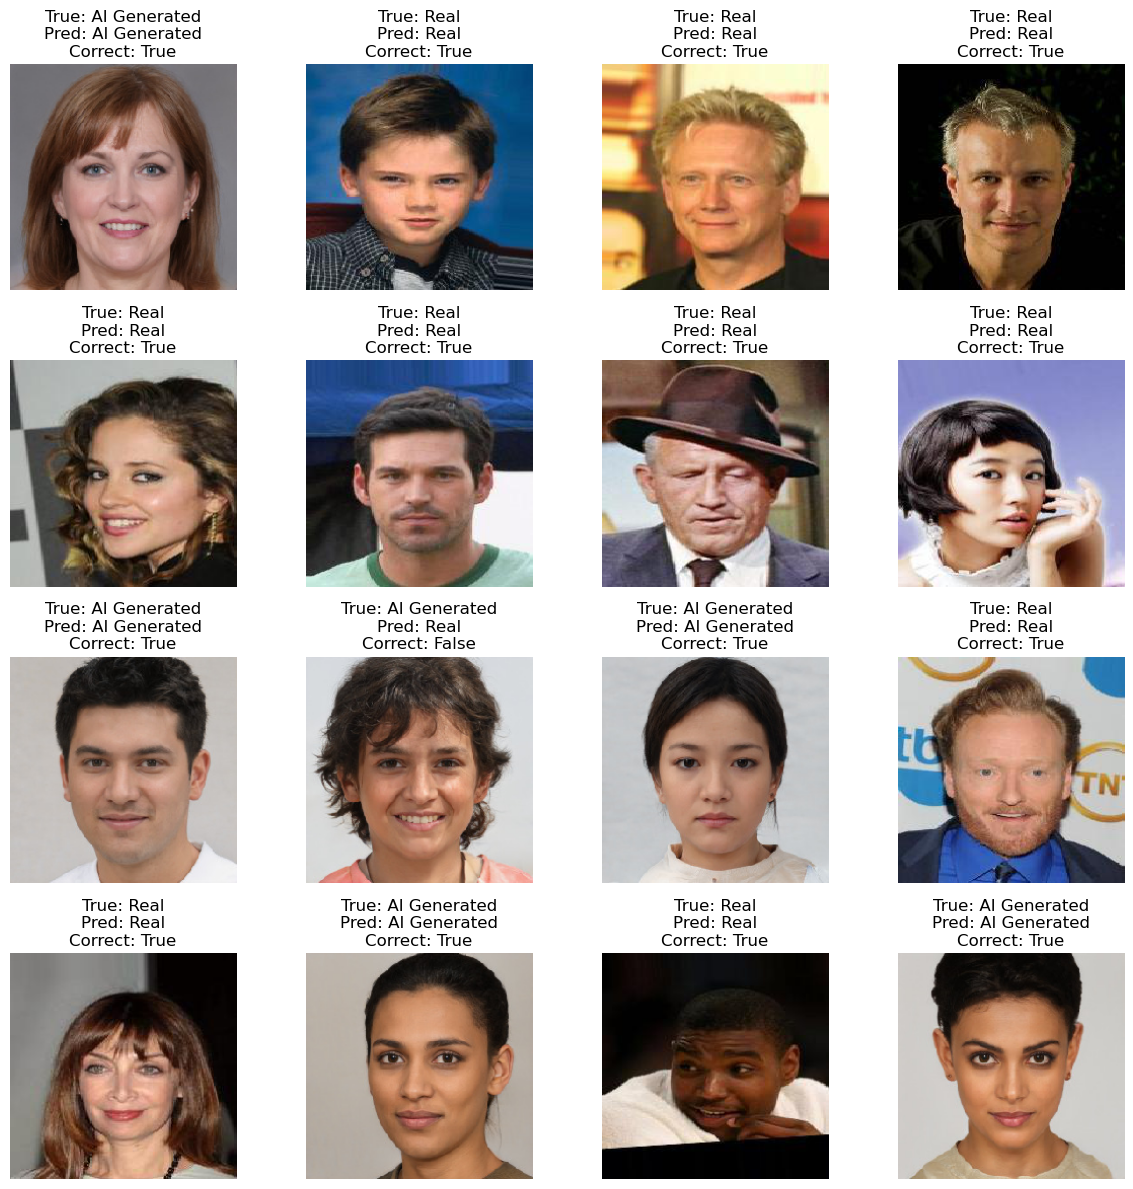

In [17]:
# Prediction visualization
def show_predictions(model, generator, num_images=16, threshold=0.5):
    images, true_labels = next(generator)
    images, true_labels = images[:num_images], true_labels[:num_images]

    predictions = model.predict(images)
    predicted_labels = (predictions >= threshold).astype(int).flatten()

    true_label_names = ["Real" if label == 1 else "AI Generated" for label in true_labels]
    predicted_label_names = ["Real" if label == 1 else "AI Generated" for label in predicted_labels]
    correct_predictions = predicted_labels == true_labels.flatten()

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"True: {true_label_names[i]}\nPred: {predicted_label_names[i]}\nCorrect: {correct_predictions[i]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_predictions(model, val_generator, num_images=16, threshold=0.5)

The model demonstrates excellent predictive performance, correctly classifying **15 out of 16 images**. This **93.75% accuracy** on the validation set suggests strong generalization and reliability in distinguishing real and AI-generated faces.

In [19]:
# save the model
model.save("final_model.h5") 

#### **Test the model using external input.**

We need to preprocess all the images for prediction with the right parameters used for training the model.

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
try:
    model = tf.keras.models.load_model("final_model.h5")
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

# Function to preprocess the image
def preprocess_image(img):
    img = img.resize((224, 224))  # Resize image to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    return img_array

**Test the model with an external input(image).**

1. Let us test the model using an AI generated image downloaded externally.

In [63]:
img=image.load_img("C:/Users/anany/Downloads/aiface.jpg")
processed_img = preprocess_image(img)
prediction = model.predict(processed_img)
result = "Real" if prediction[0][0] > 0.5 else "AI Generated"
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction: AI Generated


2. Let us test the model using a real human face image.

In [65]:
img=image.load_img("C:/Users/anany/Downloads/humanface_pm.jpeg")
processed_img = preprocess_image(img)
prediction = model.predict(processed_img)
result = "Real" if prediction[0][0] > 0.5 else "AI Generated"
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Prediction: Real


We can see that our model was able to sucessfully differentiate the Real human face and AI generated human face

#### Important Note:

The final model achieves a very low error rate, demonstrating strong accuracy in distinguishing real and AI-generated faces. However, there is still room for improvement. We can further enhance the model by training with more data, experimenting with different architectures, data augmentation, or advanced fine-tuning techniques. Continuous refinement will help achieve even greater precision.

Author:
Ananya P S